In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
data=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0299-09.HMXL.nc')
plotvar = data.variables['HMXL'][0,:,:]
result = plotvar[:,500:2000]
#result = plotvar

In [3]:
plotvar2 = data.variables['HMXL']

In [4]:
plotvar2.shape

(1, 601, 3600)

In [5]:
        datau=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0021-01.UVEL.nc')
        plotvaru = datau.variables['UVEL'][0,1,:,500:2000]
        lontu = datau.variables['ULONG'][:,500:2000]
        lattu = datau.variables['ULAT'][:,500:2000]

In [6]:
        result[result == -1] = np.nan
       # result[result >  1000] = np.nan

In [7]:
result

masked_array(
  data=[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [2761.77490234375, 3035.02734375, 4001.306396484375, ...,
         19127.921875, 19229.19140625, 19492.65234375],
        [3492.1904296875, 4100.224609375, 4468.7529296875, ...,
         19123.009765625, 19513.01171875, 19711.533203125],
        [3977.655029296875, 4432.59716796875, 4433.78271484375, ...,
         18940.744140625, 19347.953125, 19659.099609375]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],
  fill_value=9.96921e+36,
  dtype=float32)

In [8]:
nice_cmap= nice_cmap=plt.get_cmap('Blues')
#nice_cmap=plt.get_cmap('jet')
#lev_cmap = nice_cmap([10,20,30,40,50,60,70,80,90,100,110,120,140,150,160,170,180,190,200,210,220,230,240,290,300])
lev_cmap = nice_cmap([300,290,240,230,220,210,200,190,180,170,160,150,140,120,110,100,90,80,70,60,50,40,30,20,10])
#new_cmap = cols.ListedColormap(lev_cmap,"jet")
nice_cmap= nice_cmap=plt.get_cmap('Blues')
#lev_cmap = nice_cmap([10,20,30,40,50,60,70,80,90,100,110,120,130,150,160,170,180,185,190,\
                      #195,200,210,220,230,235,250]) 
new_cmap = cols.ListedColormap(lev_cmap)
nice_levels = [-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75,3]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#nice_levels = [40,60,80,100,120,140,160,180,200]
nice_levels = [-150,-140,-130,-120,-110,-100,-90,-80,-70,-60,-50]
#levels = [220,-60]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)

In [9]:
lont2 = lontu[200:,700]
latt2 = lattu[200:,700]

/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


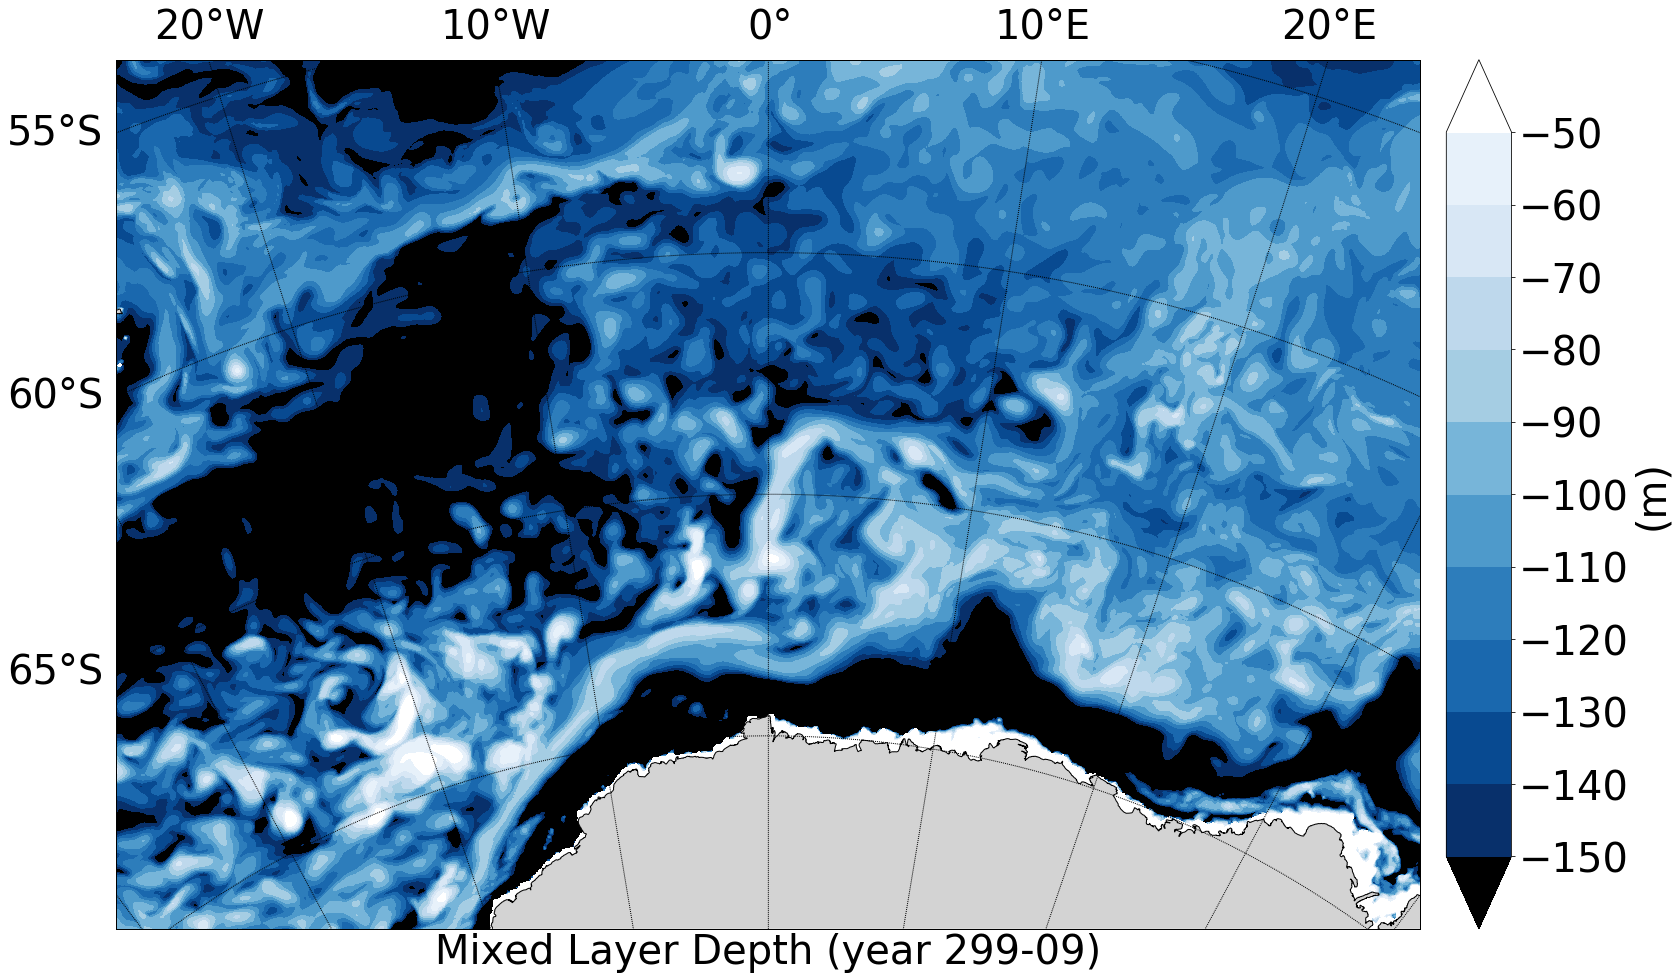

In [10]:

        plt.figure(figsize=(25,20))
        my_font = {'fontname':'Cambria', 'size':'40'}

        map = Basemap(projection='aeqd', lat_0 = -65, lon_0 = 0,area_thresh = 100,\
                     width = 3000000,height = 2000000,resolution ='h') 
        map.drawcoastlines()
        map.fillcontinents(color = 'lightgrey')
        map.drawmapboundary(color='black')
 
        map.drawparallels(np.arange(-90,91,5),labels=[1,0,0,0],**my_font)
        map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)
       
        xq,yq=map(lontu,lattu)
        #x2,y2=map(lont2,latt2)
        #map.plot(x2,y2,'black',linewidth=8)
        CP = map.contourf(xq,yq,-result/100,cmap = new_cmap,levels = nice_levels,extend='both')
        
        CP.cmap.set_under('black')
        CP.cmap.set_over('white')
        cbar =map.colorbar(CP,extend='both',extendfrac='auto',ticks= nice_levels)
      
        cbar.ax.tick_params(labelsize=40) 
        cbar.set_label('(m)', **my_font)
        plt.xlabel('Mixed Layer Depth (year 299-09)',**my_font)
        plt.savefig("mix(261-09)",bbox_inches='tight')

In [11]:
data=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0299-09.SALT.nc')
plotvars = data.variables['SALT'][0,:,:]
lont = data.variables['TLONG']
latt = data.variables['TLAT']
lont1 = lont[224:343,600:1400]
latt1 = latt[224:343,600:1400]
#########121-09
lont = lont[:,:]
latt = latt[:,:]
plotvars = plotvars[15,:,:]
plotvars[plotvars == -1000.0] = np.nan
#plotvar = (plotvar - 1)*1000

/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: The following kwargs were not used by contour: 'spacing'


Text(0.5, 0, 'Time 299-09 (Salinity, depth=305m)')

findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


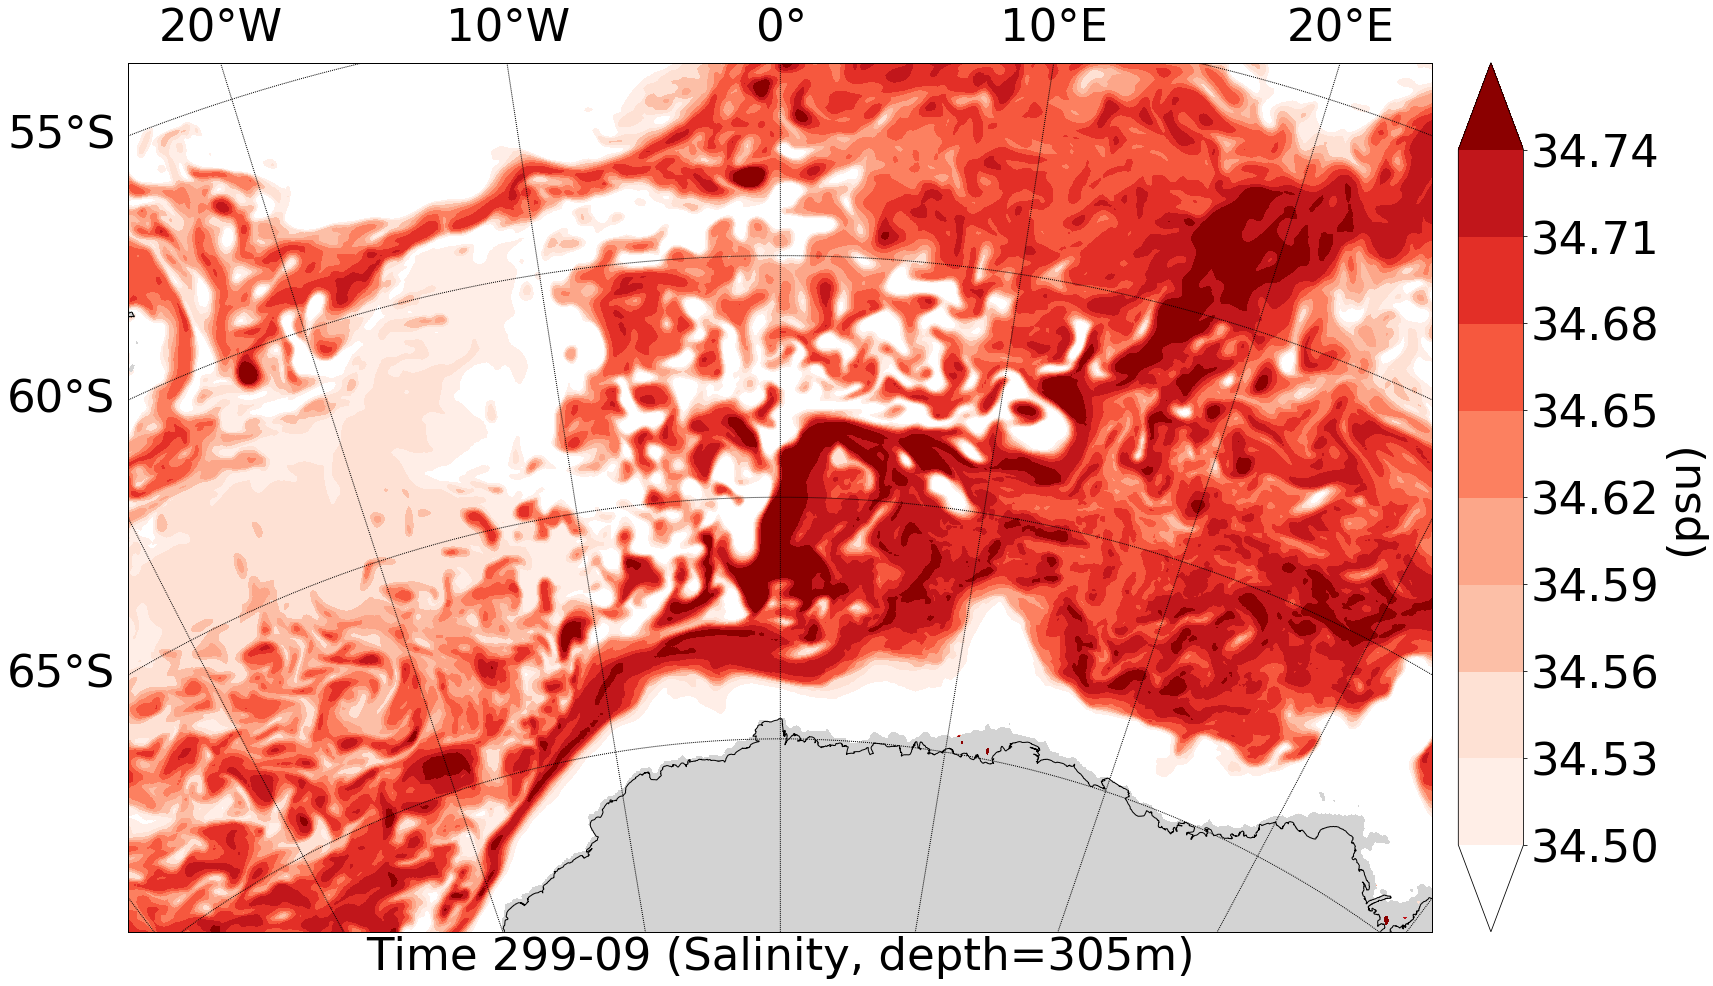

In [12]:
#####################################################################
nice_cmap=plt.get_cmap('Reds')
lev_cmap = nice_cmap([10,20,30,40,50,60,70,80,90,100,110,120,140,150,160,170,180,190,200])
new_cmap = cols.ListedColormap(lev_cmap,"Reds")
#nice_levels = [34.20,34.30,34.35,34.40,34.45,34.50,34.65,34.70,34.72,34.73]
nice_levels = [34.5,34.53,34.56,34.59,34.62,34.65,34.68,34.71,34.74]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#********************************************************************
##34.50,34.55,34.60,
plt.figure(figsize=(25,20))
my_font = {'fontname':'Cambria', 'size':'45'}
# set the mapping range
map = Basemap(projection='aeqd', lat_0 = -65, lon_0 = 0,area_thresh = 100,\
                width = 3000000,height = 2000000,resolution ='h') 
##width = 2500000,height = 1500000
##lat_0 = -65, lon_0 = 0
#############################################
map.drawcoastlines()
map.fillcontinents(color = 'lightgrey')
map.drawmapboundary(color='black')
 
map.drawparallels(np.arange(-90,91,5),labels=[1,0,0,0],**my_font)
map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

x,y=map(lont,latt)
CP = map.contourf(x,y,plotvars,cmap = new_cmap,norm =norm,spacing = 'uniform',levels = nice_levels,extend='both')
map.drawmapboundary(fill_color='lightgrey')
CP.cmap.set_over('darkred')
CP.cmap.set_under('white')

#CS=map.contour(x,y,plotvar,[0.1,0.2],colors = 'b', linestyles = 'solid',linewidths=3)
CS=map.contour(x,y,plotvar,[700],colors = 'r', linestyles = 'solid',linewidths=1)
plt.clabel(CS, inline=0.1, fontsize=30)
#cbar =map.colorbar(CP,extend='both',extendfrac='auto',extendrect='True')
cbar =map.colorbar(CP,extendfrac='auto')
cbar.ax.tick_params(labelsize=45) 
cbar.set_label('(psu)', **my_font)
plt.xlabel("Time 299-09 (Salinity, depth=305m)",**my_font)

In [13]:
data=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0299-09.TEMP.nc')
plotvart = data.variables['TEMP'][0,:,:]
lontt = data.variables['TLONG']
lattt = data.variables['TLAT']
######################121-09
lont222 = lontt[:,500:2000]
latt222 = lattt[:,500:2000]
plotvart = plotvart[15,:,500:2000]
lont2 = lont[200:,700]
latt2 = latt[200:,700]
plotvart[plotvart == -1.0] = np.nan

/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:32: UserWarning: The following kwargs were not used by contour: 'spacing'


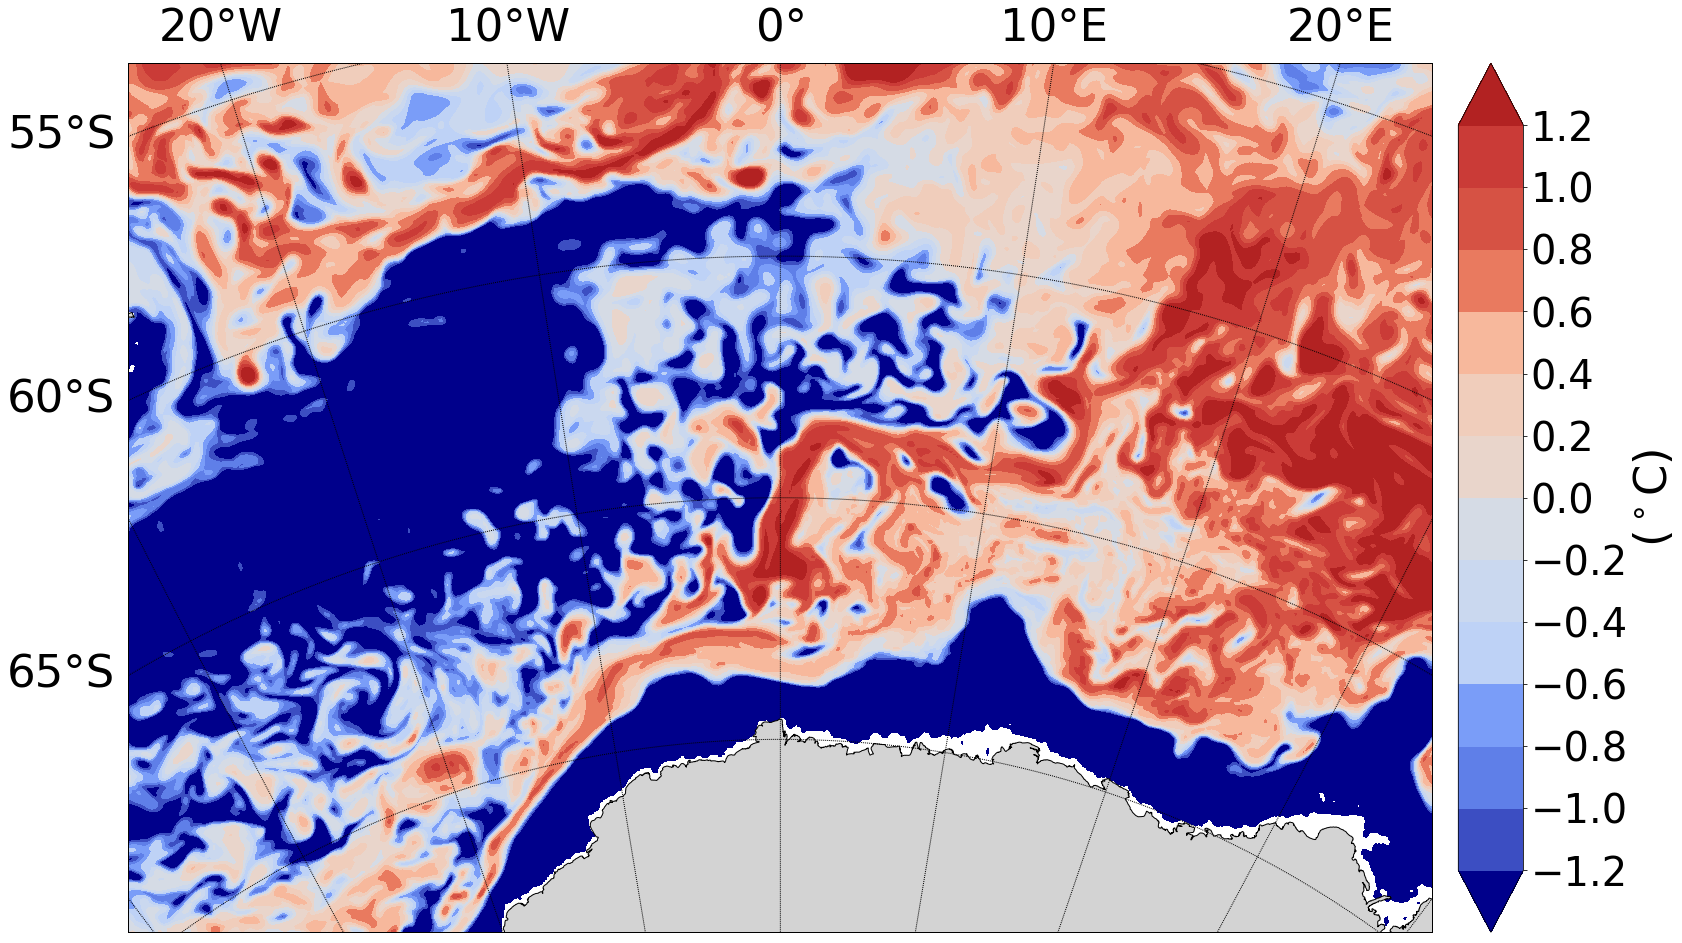

In [14]:
nice_cmap=plt.get_cmap('coolwarm')
#nice_cmap=sns.diverging_palette(245, 15, n=13,as_cmap=True)
lev_cmap = nice_cmap([1,30,50,80,100,110,120,140,150,170,190,210,230,240]) 
#lev_cmap = nice_cmap([1,30,50,70,100,130,140,150,160,170,180,190,210,230,240])
#new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
new_cmap = cols.ListedColormap(lev_cmap,"coolwarm")

#new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
nice_levels = [-1.2,-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1,1.2]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#********************************************************************

plt.figure(figsize=(25,20))
my_font = {'fontname':'Cambria', 'size':'45'}
# set the mapping range
map = Basemap(projection='aeqd', lat_0 = -65, lon_0 = 0,area_thresh = 100,\
                     width = 3000000,height = 2000000,resolution ='h') 
#############################################
##width = 2500000,height = 1500000
##lat_0 = -65, lon_0 = 0
#############################################
map.drawcoastlines()
map.fillcontinents(color = 'lightgrey')
map.drawmapboundary(color='black')
 
map.drawparallels(np.arange(-90,91,5),labels=[1,0,0,0],**my_font)
map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

x,y=map(lont222,latt222)
#x2,y2=map(lont2,latt2)
#map.plot(x2,y2,'black',linewidth=8)
CP = map.contourf(x,y,plotvart,levels = nice_levels,cmap = new_cmap,spacing = 'uniform',extend='both')
CP.cmap.set_over('firebrick')
CP.cmap.set_under('darkblue')

#CS=map.contour(x,y,plotvar,[700],colors = 'r', linestyles = 'solid',linewidths=1)
#plt.clabel(CS, inline=0.1, fontsize=30)
#cbar =map.colorbar(CP,extend='both',extendfrac='auto',extendrect='True')
cbar =map.colorbar(CP,extendfrac='auto',ticks= nice_levels)
#cbar.minorticks_on()
cbar.ax.tick_params(labelsize=40) 
cbar.set_label('($^\circ$C)', **my_font)

/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: The following kwargs were not used by contour: 'spacing'
/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:71: UserWarning: The following kwargs were not used by contour: 'spacing'
/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:105: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and wi

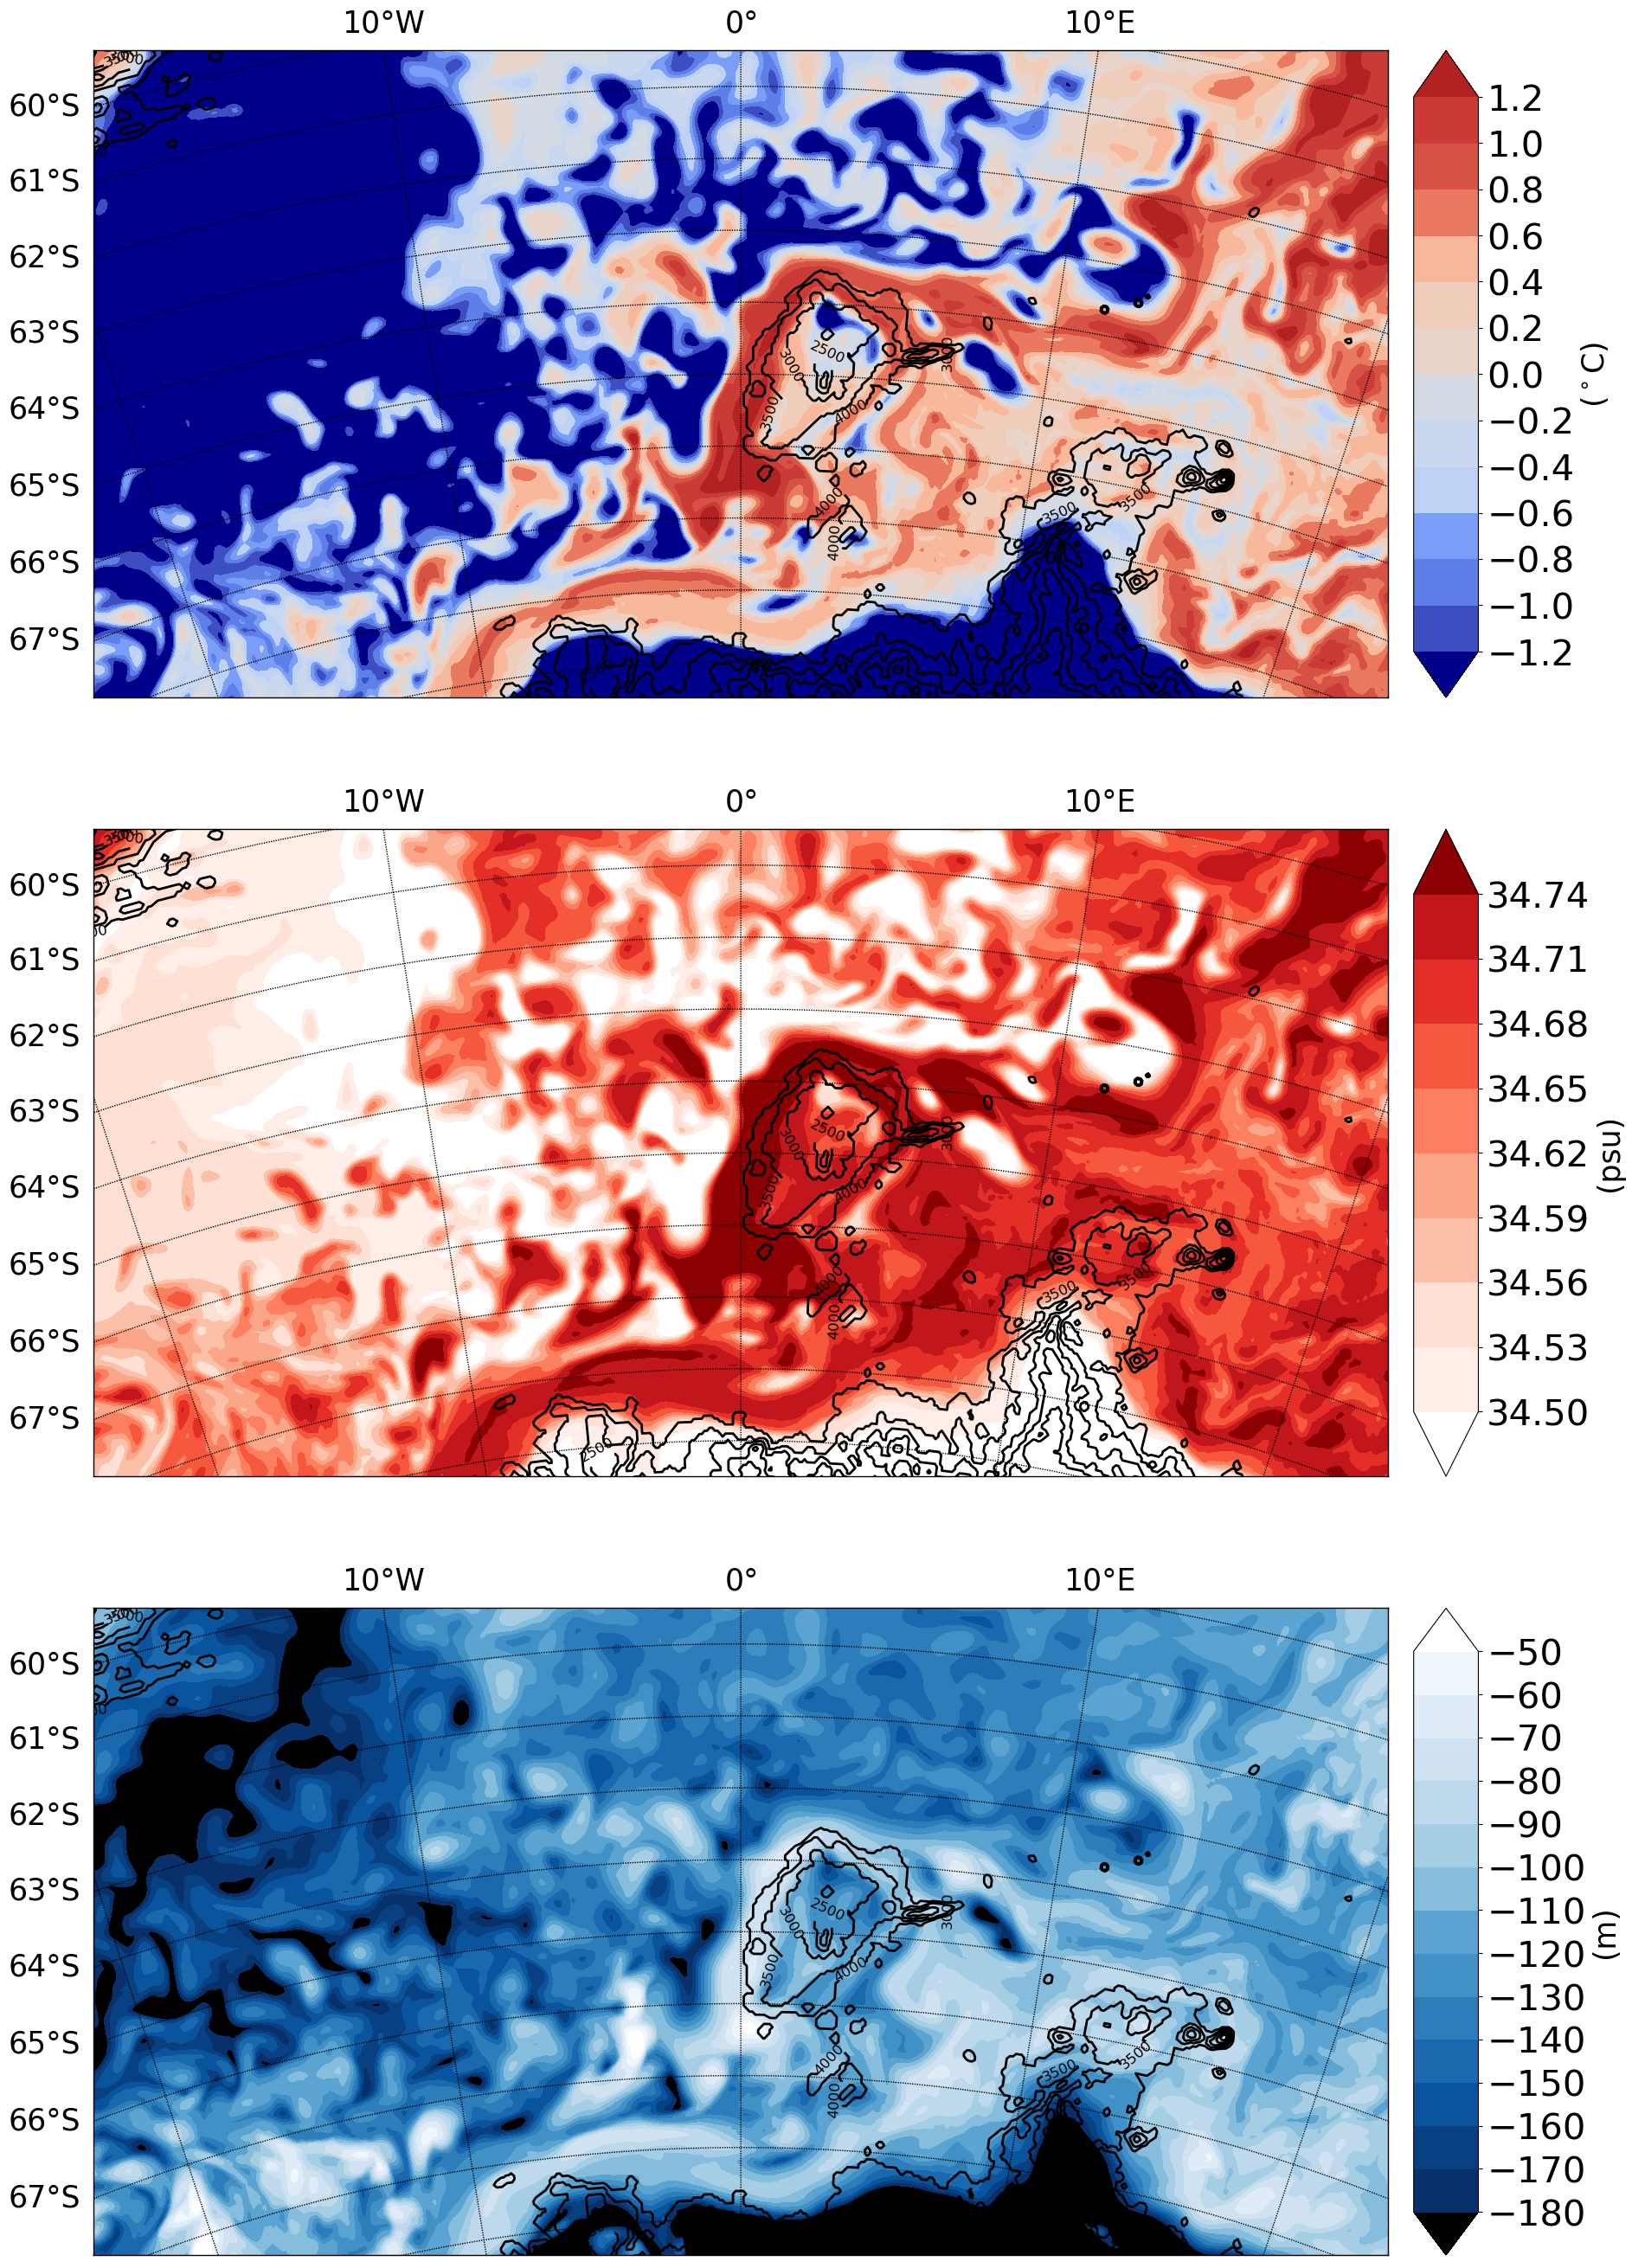

In [34]:
my_font = {'fontname':'Cambria', 'size':'25'}
##################################################################
fig = plt.figure(figsize=(20,30), dpi=100)
ax1 = fig.add_axes([0.1, 0.9, 0.8, 0.28],
                    xticklabels=[])
nice_cmap=plt.get_cmap('coolwarm')
#nice_cmap=sns.diverging_palette(245, 15, n=13,as_cmap=True)
lev_cmap = nice_cmap([1,30,50,80,100,110,120,140,150,170,190,210,230,240]) 
#lev_cmap = nice_cmap([1,30,50,70,100,130,140,150,160,170,180,190,210,230,240])
#new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
new_cmap = cols.ListedColormap(lev_cmap,"coolwarm")
nice_levels2 = [2000,2500,3000,3500,4000]
#new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
nice_levels = [-1.2,-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1,1.2]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#********************************************************************

map = Basemap(projection='aeqd', lat_0 = -65, lon_0 = 0,area_thresh = 100,\
                     width = 2000000,height = 1000000,resolution ='h') 
#############################################
##width = 2500000,height = 1500000
##lat_0 = -65, lon_0 = 0
#############################################
map.drawcoastlines()
map.fillcontinents(color = 'lightgrey')
map.drawmapboundary(color='black')
 
map.drawparallels(np.arange(-90,91,1),labels=[1,0,0,0],**my_font)
map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

x,y=map(lont222,latt222)
#x2,y2=map(lont2,latt2)
#map.plot(x2,y2,'black',linewidth=8)
CP = map.contourf(x,y,plotvart,levels = nice_levels,cmap = new_cmap,spacing = 'uniform',extend='both')
CP.cmap.set_over('firebrick')
CP.cmap.set_under('darkblue')

xq2,yq2=map(lontu,lattu)
  
CS = map.contour(xq2,yq2,plotvarKMT,levels = nice_levels2,colors= 'black',linestyles = 'solid',linewidths=2)
plt.clabel(CS,fontsize=12,fmt='%4d')
#cbar =map.colorbar(CP,extend='both',extendfrac='auto',extendrect='True')
cbar =map.colorbar(CP,extendfrac='auto',ticks= nice_levels)
#cbar.minorticks_on()
cbar.ax.tick_params(labelsize=30) 
cbar.set_label('($^\circ$C)', **my_font)
############################
ax2 = fig.add_axes([0.1, 0.6, 0.8, 0.28])
#####################################################################
nice_cmap=plt.get_cmap('Reds')
lev_cmap = nice_cmap([10,20,30,40,50,60,70,80,90,100,110,120,140,150,160,170,180,190,200])
new_cmap = cols.ListedColormap(lev_cmap,"Reds")
#nice_levels = [34.20,34.30,34.35,34.40,34.45,34.50,34.65,34.70,34.72,34.73]
nice_levels = [34.5,34.53,34.56,34.59,34.62,34.65,34.68,34.71,34.74]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#********************************************************************
##34.50,34.55,34.60,
map = Basemap(projection='aeqd', lat_0 = -65, lon_0 = 0,area_thresh = 100,\
                     width = 2000000,height = 1000000,resolution ='h') 
##width = 2500000,height = 1500000
##lat_0 = -65, lon_0 = 0
#############################################
map.drawcoastlines()
map.fillcontinents(color = 'lightgrey')
map.drawmapboundary(color='black')
 
map.drawparallels(np.arange(-90,91,1),labels=[1,0,0,0],**my_font)
map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

x,y=map(lont,latt)
CP = map.contourf(x,y,plotvars,cmap = new_cmap,norm =norm,spacing = 'uniform',levels = nice_levels,extend='both')
map.drawmapboundary(fill_color='lightgrey')
CP.cmap.set_over('darkred')
CP.cmap.set_under('white')

#CS=map.contour(x,y,plotvar,[0.1,0.2],colors = 'b', linestyles = 'solid',linewidths=3)
xq2,yq2=map(lontu,lattu)
  
CS = map.contour(xq2,yq2,plotvarKMT,levels = nice_levels2,colors= 'black',linestyles = 'solid',linewidths=2)
plt.clabel(CS,fontsize=12,fmt='%4d')
#cbar =map.colorbar(CP,extend='both',extendfrac='auto',extendrect='True')
cbar =map.colorbar(CP,extendfrac='auto')
cbar.ax.tick_params(labelsize=30) 
cbar.set_label('(psu)', **my_font)

ax3 = fig.add_axes([0.1, 0.3, 0.8, 0.28])

nice_cmap= nice_cmap=plt.get_cmap('Blues')
#nice_cmap=plt.get_cmap('jet')
#lev_cmap = nice_cmap([10,20,30,40,50,60,70,80,90,100,110,120,140,150,160,170,180,190,200,210,220,230,240,290,300])
lev_cmap = nice_cmap([300,290,240,230,220,210,200,190,180,170,160,150,140,120,110,100,90,80,70,60,50,40,30,20,10])
#new_cmap = cols.ListedColormap(lev_cmap,"jet")
nice_cmap= nice_cmap=plt.get_cmap('Blues')
#lev_cmap = nice_cmap([10,20,30,40,50,60,70,80,90,100,110,120,130,150,160,170,180,185,190,\
                      #195,200,210,220,230,235,250]) 
new_cmap = cols.ListedColormap(lev_cmap)
nice_levels = [-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75,3]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#nice_levels = [40,60,80,100,120,140,160,180,200]
nice_levels = [-180,-170,-160,-150,-140,-130,-120,-110,-100,-90,-80,-70,-60,-50]
#levels = [220,-60]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)

map = Basemap(projection='aeqd', lat_0 = -65, lon_0 = 0,area_thresh = 100,\
                     width = 2000000,height = 1000000,resolution ='h') 
map.drawcoastlines()
map.fillcontinents(color = 'lightgrey')
map.drawmapboundary(color='black')
 
map.drawparallels(np.arange(-90,91,1),labels=[1,0,0,0],**my_font)
map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)
       
xq,yq=map(lontu,lattu)
        #x2,y2=map(lont2,latt2)
        #map.plot(x2,y2,'black',linewidth=8)
CP = map.contourf(xq,yq,-result/100,cmap = new_cmap,levels = nice_levels,extend='both')


xq2,yq2=map(lontu,lattu)
  
CS = map.contour(xq2,yq2,plotvarKMT,levels = nice_levels2,colors= 'black',linestyles = 'solid',linewidths=2)
plt.clabel(CS,fontsize=12,fmt='%4d')

CP.cmap.set_under('black')
CP.cmap.set_over('white')
cbar =map.colorbar(CP,extend='both',extendfrac='auto',ticks= nice_levels)
      
cbar.ax.tick_params(labelsize=30) 
cbar.set_label('(m)', **my_font)
#plt.xlabel('Mixed Layer Depth (year 299-09)',**my_font)
plt.savefig("mixpaper(299-09)",bbox_inches='tight')

In [26]:
        data=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0021-01.KMT.nc')
        plotvarKMT = data.variables['KMT'][:,500:2000]

In [27]:
        datau=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0021-01.UVEL.nc')
        plotvaru = datau.variables['UVEL'][0,1,:,:]
        lontu = datau.variables['ULONG'][:,500:2000]
        lattu = datau.variables['ULAT'][:,500:2000]

In [28]:
        data=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0021-01.z_w_bot.nc')
        plotvar2 = data.variables['z_w_bot'][:]

In [29]:
depth = plotvar2/100
num = np.arange(1,62)
for i in num: 
    plotvarKMT[plotvarKMT==i] = depth[i]
    
plotvarKMT[plotvarKMT==0] = -1
#lontu[lontu ==-1] = np.nan
#lattu[lattu ==-1] = np.nan
#lontu[:,1089] = -1

